# Task 1

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.model_selection import train_test_split

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df.drop('target', axis=1)
y = df['target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
print(X_train.shape)


(120, 4)


In [54]:
def _distances(X_train, X_test):
    result_distances = []
    for _, sample in X_test.iterrows():
        differences = X_train.sub(sample, axis=1) 
        squared = differences.pow(2)
        dist = squared.sum(axis=1)
        result_distances.append(dist)
    return pd.DataFrame(result_distances)

distances = _distances(X_train, X_test)
print(distances.shape)

(30, 120)


In [55]:
def _neighbors(distances, n):
    return distances.apply(lambda row: row.nsmallest(n).index.tolist(), axis=1)

neighbors = _neighbors(distances, n = 5)
print(neighbors.shape)

(30,)


In [56]:
def _target(neighbors, y_train):
    predictions = []
    for neighbors in neighbors:
        values = y_train.iloc[neighbors]
        mode = values.mode()[0] 
        predictions.append(mode)
    return pd.Series(predictions)

y_pred = _target(neighbors, y_train) 
print(y_pred.shape)
accuracy = np.mean(y_pred == y_test.reset_index(drop=True))
print(accuracy)

(30,)
1.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

distances = _distances(X_train, X_test)
neighbors = _neighbors(distances, n = 5)
y_pred = _target(neighbors, y_train)

accuracy = np.mean(y_pred == y_test.reset_index(drop=True))
print(accuracy)

0.8833333333333333


In [62]:
class KNN:
    def __init__(self, n):
        self.n_neighbors = n
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train.reset_index(drop=True)
        self.y_train = y_train.reset_index(drop=True)

    def predict(self, X):
        distances = _distances(self.X_train, X)
        neighbors = _neighbors(distances, self.n_neighbors)
        return _target(neighbors, self.y_train)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y.reset_index(drop=True))

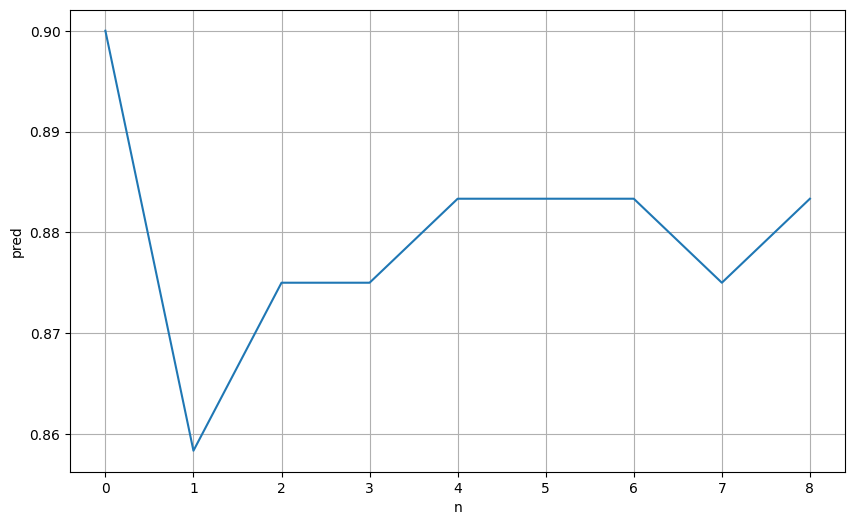

In [65]:
scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
for n in range(1, 10):
    knn = KNN(n=n)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(scores)
plt.xlabel('n')
plt.ylabel('pred')
plt.grid()
plt.show()